#### Import all libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm

In [14]:
# Load the CSV file
data = pd.read_csv("SM_data.csv")

# Display the first few rows of the data
print(data.head())

# Display the dimensions of the data
print(data.shape)


         H     PL     AL    FL MF
0  161.544  10.43  16.36  21.6  F
1  176.000  20.00  26.00  27.0  M
2  180.000  20.00  30.00  22.0  M
3  176.000  12.00  28.00  15.0  M
4  181.000  20.00  25.00  28.0  M
(74, 5)


In [15]:
# Calculate the mean
mean_H = data['H'].mean()
mean_PL = data['PL'].mean()
mean_AL = data['AL'].mean()
mean_FL = data['FL'].mean()
mean_MF = (data['MF'] == "M").mean()

# Print the mean
print(f"mean_H = {mean_H}")
print(f"mean_PL = {mean_PL}")
print(f"mean_AL = {mean_AL}")
print(f"mean_FL = {mean_FL}")
print(f"mean_MF = {mean_MF}")

mean_H = 166.71383783783784
mean_PL = 17.49864864864865
mean_AL = 28.997837837837835
mean_FL = 23.705405405405408
mean_MF = 0.6486486486486487


In [16]:
# Calculate the median
median_H = data['H'].median()

# Print the median
print(f"median_H = {median_H}")
print(f"mean_H = {mean_H}")

median_H = 167.57
mean_H = 166.71383783783784


In [17]:
# Calculate the variance
var_H = data['H'].var()		# Unbiased

# Print the variance
print(f"var_H = {var_H}")

var_H = 124.38555843909661


In [18]:
# Calculate the sd
sd_H = data['H'].std()

# Print the sd
print(f"sd_H = {sd_H}")

sd_H = 11.152827374217562


In [19]:
((data['H'] - mean_H) ** 2).sum()
biased_var = (((data['H'] - mean_H) ** 2).sum()) / len(data['H'])
unbiased_var = (((data['H'] - mean_H) ** 2).sum()) / (len(data['H']) - 1)
print(f"biased variance = {biased_var}")
print(f"unbiased variance = {unbiased_var}")

biased variance = 122.70467251424395
unbiased variance = 124.38555843909661


In [20]:
# Calculate the range
range_H = (data['H'].min(), data['H'].max())

# Print the range
print(f"range_H = {range_H}")

range_H = (132.0, 183.0)


In [22]:
summary_H = data['H'].describe()
print(f"summary_H:\n{summary_H}")

summary_H:
count     74.000000
mean     166.713838
std       11.152827
min      132.000000
25%      160.250000
50%      167.570000
75%      175.750000
max      183.000000
Name: H, dtype: float64


In [23]:
summary_data = data.describe()
print(f"summary_data:\n{summary_data}")

summary_data:
                H         PL         AL         FL
count   74.000000  74.000000  74.000000  74.000000
mean   166.713838  17.498649  28.997838  23.705405
std     11.152827   3.074815  14.045544   3.611469
min    132.000000   6.000000  12.000000   8.000000
25%    160.250000  16.425000  23.100000  22.125000
50%    167.570000  18.000000  26.000000  24.000000
75%    175.750000  19.000000  28.475000  26.000000
max    183.000000  25.000000  81.000000  28.300000


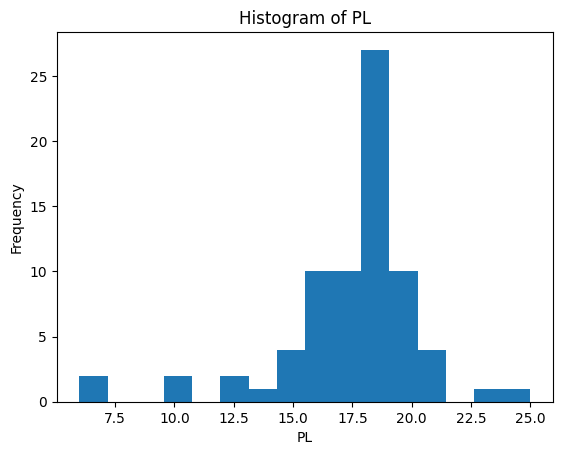

In [24]:
# Fitting Normal distribution to data$PL
plt.hist(data['PL'], bins='auto')  # You can specify the number of bins if needed
plt.xlabel('PL')
plt.ylabel('Frequency')
plt.title('Histogram of PL')
plt.show()

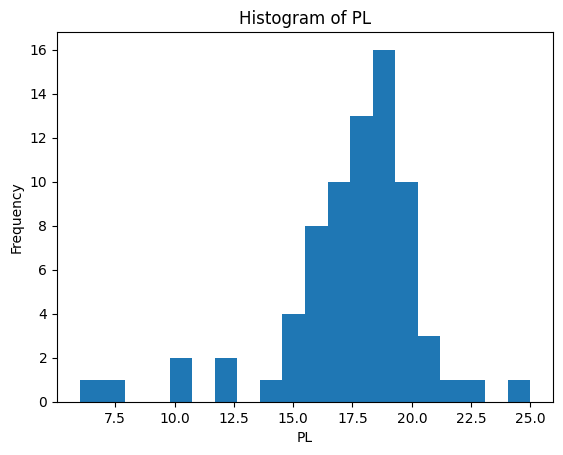

In [25]:
plt.hist(data['PL'], bins=20)  # You can specify the number of bins if needed
plt.xlabel('PL')
plt.ylabel('Frequency')
plt.title('Histogram of PL')
plt.show()

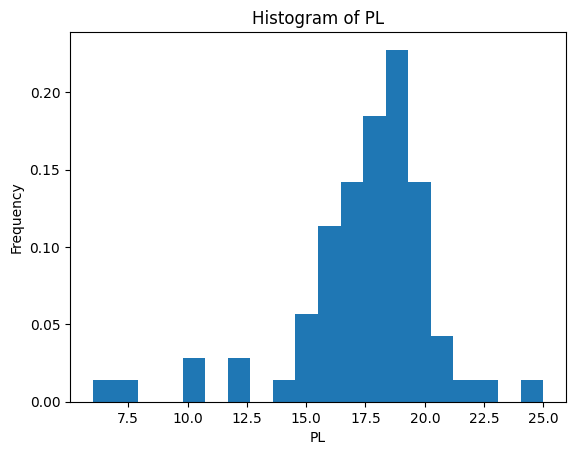

In [26]:
plt.hist(data['PL'], bins=20, density=True)
plt.xlabel('PL')
plt.ylabel('Frequency')
plt.title('Histogram of PL')
# Display the plot
plt.show()

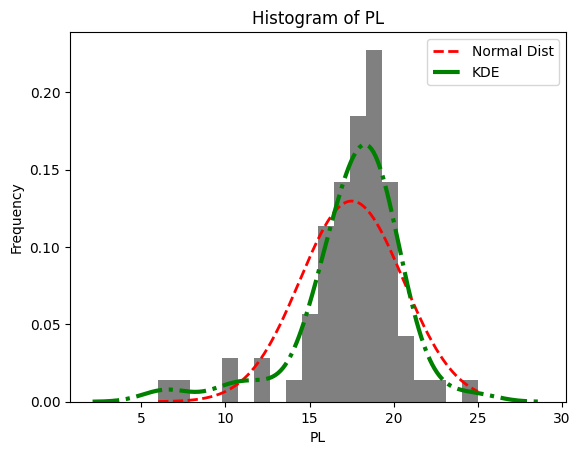

In [27]:
m = data['PL'].mean()
v = data['PL'].var()

s = np.arange(data['PL'].min(), data['PL'].max() + 0.05, 0.05)

y = norm.pdf(s, loc=m, scale=np.sqrt(v))

# Normal distribution
plt.plot(s, y, color='red', linewidth=2, linestyle='--', label='Normal Dist')
# Non-parametric density estimation or Kernel density estimation (KDE)
sns.kdeplot(data['PL'], color='green', linewidth=3, linestyle='-.', label='KDE')

plt.hist(data['PL'], bins=20, density=True, color='gray')
plt.xlabel('PL')
plt.ylabel('Frequency')
plt.title('Histogram of PL')

# Adding labels and legend
plt.legend()

# Display the plot
plt.show()

In [28]:
t_stat, p_value = stats.ttest_1samp(data['PL'], popmean=0)

confidence_level = 0.95
df = len(data['PL']) - 1  # degrees of freedom

confidence_interval = stats.t.interval(confidence_level, df, loc=m, scale=stats.sem(data['PL']))

# Output the results
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Mean:", m)
print("95% confidence interval:", confidence_interval)

t-statistic: 48.95548423398954
p-value: 1.4298495740284039e-57
Mean: 17.49864864864865
95% confidence interval: (16.786271741149903, 18.211025556147398)


In [30]:
# Data and parameters
PL = data['PL']  # Palm length data
sigma = 3  # Hypothesized standard deviation
conf_level = 0.95
n = len(PL)
alpha = 1 - conf_level

# Compute sample variance
sample_variance = np.var(PL, ddof=1)

# Chi-square critical values for the confidence interval
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Confidence interval for the variance
conf_int_lower = (n - 1) * sample_variance / chi2_upper
conf_int_upper = (n - 1) * sample_variance / chi2_lower

# Print the 95% confidence interval for the variance
print(f"95% CI of the variance of palm length is ({conf_int_lower:.4f}, {conf_int_upper:.4f})")

95% CI of the variance of palm length is (7.0057, 13.4630)


In [31]:
conf_int = [chi2_lower, chi2_upper]  # Replace with actual values from previous calculations

# Print the confidence interval
print(f"95% CI of the var of palm length is ({conf_int[0]}, {conf_int[1]})")

95% CI of the var of palm length is (51.26481327342183, 98.51626201156778)


In [32]:
cov_mat = data.iloc[:, 0:4].cov()
print(cov_mat)

             H         PL          AL         FL
H   124.385558  16.754045    3.163261  14.759672
PL   16.754045   9.454489    8.545131   9.744364
AL    3.163261   8.545131  197.277310   9.885190
FL   14.759672   9.744364    9.885190  13.042710


In [33]:
data.iloc[:, 0:4].corr()

,H,PL,AL,FL
H,1.000000,0.488557,0.020193,0.366444
PL,0.488557,1.000000,0.197861,0.877507
AL,0.020193,0.197861,1.000000,0.194878
FL,0.366444,0.877507,0.194878,1.000000


In [35]:
eg_cov = np.linalg.eig(cov_mat)

# `eg_cov[0]` contains the eigenvalues, and `eg_cov[1]` contains the eigenvectors
print(eg_cov[0])

[198.56145661 128.52459064  15.85488253   1.21913765]


In [36]:
X = data[['PL', 'AL', 'FL']]  # Independent variables
y = data['H']  # Dependent variable

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
reg1 = sm.OLS(y, X).fit()

# Print the regression summary (optional)
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      H   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     8.231
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           9.14e-05
Time:                        16:55:10   Log-Likelihood:                -271.78
No. Observations:                  74   AIC:                             551.6
Df Residuals:                      70   BIC:                             560.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.0987      7.667     18.404      0.0

In [37]:
X = data['PL']  # Independent variables
y = data['H']  # Dependent variable

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
reg2 = sm.OLS(y, X).fit()

# Print the regression summary (optional)
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      H   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     22.57
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.00e-05
Time:                        16:55:24   Log-Likelihood:                -272.87
No. Observations:                  74   AIC:                             549.7
Df Residuals:                      72   BIC:                             554.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.7050      6.625     20.483      0.0

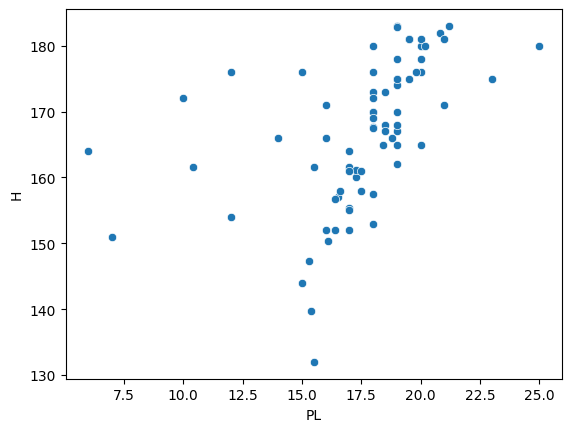

In [38]:
# Create a scatter plot using seaborn
sns.scatterplot(x='PL', y='H', data=data)

# Show the plot
plt.show()

C:\Users\kajal\AppData\Local\Temp\ipykernel_16692\1150048116.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = reg2.params[0]
C:\Users\kajal\AppData\Local\Temp\ipykernel_16692\1150048116.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = reg2.params[1]


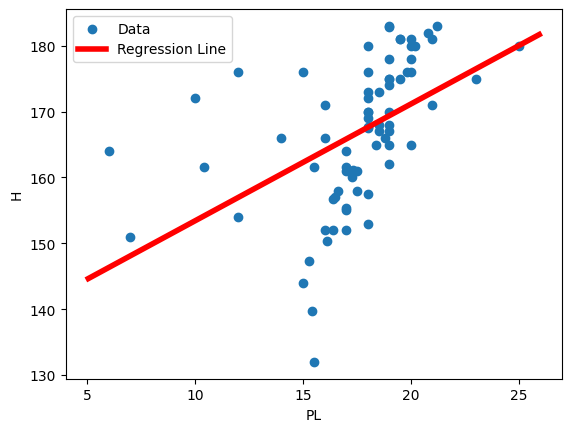

In [39]:
# Scatter plot of H (dependent variable) against PL (independent variable)
plt.scatter(data['PL'], data['H'], label='Data')

# Extract the intercept and slope from the regression model
intercept = reg2.params[0]
slope = reg2.params[1]

# Plot the regression line (abline in R)
x_vals = np.array(plt.gca().get_xlim())  # Get current x-axis limits
y_vals = intercept + slope * x_vals  # Compute corresponding y-values for the regression line
plt.plot(x_vals, y_vals, color='red', linewidth=4, label='Regression Line')

# Add labels and legend
plt.xlabel('PL')
plt.ylabel('H')
plt.legend()

# Show the plot
plt.show()